In [38]:
# Tarea de ecuaciones diferenciales:

# Creemos nuestra funcion de euler para resolver la ecuacion diferencial y*x^2-1.2y
%matplotlib inline
import matplotlib.pyplot as plt      # Importamos las librerias
from sympy import *
init_printing()
import numpy as np
import sympy as sym

#notacion punto
import sympy.physics.mechanics as mech
mech.init_vprinting()
a=0.  # Inicio
b=2. # Fin
n=200 # Numero de pasos
def euler(f,x0,xn,y0,n):  # Definimos la funcion
    
    h = 0.1 # Paso
    x0_l=[]  # Lista de pasos
    yn_l=[]  # Lista de soluciones
    for i in range(n):  # Realizamos un for
        slope = f(x0, y0)   # Pendiente
        yn = y0 + h * slope  # Termino yn ecuacion de euler
        y0 = yn  # Condicion inicial
        x0 = x0+h # Actualizamos el paso
        x0_l.append(x0) # Vamos agregando lista de pasos
        yn_l.append(y0) # Importante lista de soluciones
    
    return(yn_l)  # Retornamos lista de soluciones.



def solucion_exacta(x):  # Tenemos nuestra solucion exacta para compararla
    return np.exp((x**3/3)-1.2*x    ) # Retornamos la solucion.

def f(x,y): # Definimos nuestra funcion de resultado.
  return y*x**2-1.2*y


[0.88, 0.77528, 0.68534752, 0.60927394528, 0.5459094549708801, 0.49404805674864644, 0.45254801998176014, 0.42041711056305514, 0.39687375237152406, 0.3813956760290346, 0.3737677625084539, 0.37414153027096236, 0.38312092699746547, 0.40189385242034126, 0.4324377852042872, 0.4778437526507374, 0.5428305030112377, 0.634568858020137, 0.764020905056245, 0.9481499431748002]


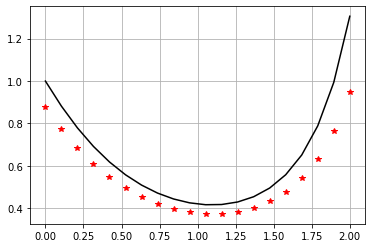

In [39]:
resultado= euler(f,0,2,1,20) # Tenemos el resultado.
print(resultado) # Imprimimos el resultado
eje=np.linspace(a,b,20) # Definimos los puntos
plt.plot(eje,resultado,'r*',label = 'solución numérica')     # Solucion numerica 
plt.plot(eje,solucion_exacta(eje),'k',label = 'solución exacta')  # Solucion exacta.
plt.grid()

In [40]:
# Implementacion de otro codigo en euler: otra forma
def euler(f,l0,lN,y0,h):  # Definimos nuestra funcion
  N=int((lN-l0)/h)  # Numero de pasos
  x=np.linspace(l0,lN,N+1)  # intervalo de pasos
  y=np.zeros(N+1) # vector de zeros.
  y[0]=y0 # Condicion inicial.
  for i in range (1,N+1):  # Realizamos un for.
    y[i]=y[i-1]+h*f(x[i-1],y[i-1]) # Aplicamos la formula de euler.
  return x,y


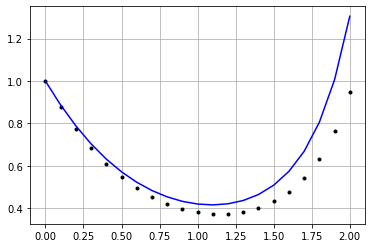

In [41]:
def f(x,y): # Definimos nuestra funcion
  return y*x**2-1.2*y
  
(x,y)=euler(f,0,2,1,0.1)  # Tenemos la funcion
plt.plot(x,y,'.k')  # Grafica.
plt.grid()                              # Solucion real y Numerica se parecen pero hay errores!
eje=np.linspace(a,b,21)
plt.plot(eje,solucion_exacta(eje),'b',label = 'solución exacta')

In [42]:
# Veamos la implementacion en simpy.
x=sym.symbols('x')  # Simbolo
y=sym.Function('y')  # Simbolo
Ed=Eq(y(x)*x**2-1.2*y(x),y(x).diff())  # Ecuacion diferencial
Ed # Ecuacion diferencial
CI={y(0):1} # Condiciones iniciales.
simplify(dsolve(Ed,y(x),ics=CI)) # Solucion por sympy.